<a href="https://colab.research.google.com/github/abhaysaxena1904/Practice/blob/main/TimeSeriesPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()


Saving sales-data.csv to sales-data.csv


{'sales-data.csv': b'1980-01,154\r\n1980-02,96\r\n1980-03,73\r\n1980-04,49\r\n1980-05,36\r\n1980-06,59\r\n1980-07,95\r\n1980-08,169\r\n1980-09,219\r\n1980-10,278\r\n1980-11,298\r\n1980-12,245\r\n1981-01,200\r\n1981-02,118\r\n1981-03,90\r\n1981-04,79\r\n1981-05,78\r\n1981-06,91\r\n1981-07,167\r\n1981-08,169\r\n1981-09,289\r\n1981-10,347\r\n1981-11,375\r\n1981-12,203\r\n1982-01,223\r\n1982-02,104\r\n1982-03,107\r\n1982-04,85\r\n1982-05,75\r\n1982-06,99\r\n1982-07,135\r\n1982-08,211\r\n1982-09,335\r\n1982-10,460\r\n1982-11,488\r\n1982-12,326\r\n1983-01,346\r\n1983-02,261\r\n1983-03,224\r\n1983-04,141\r\n1983-05,248\r\n1983-06,145\r\n1983-07,223\r\n1983-08,272\r\n1983-09,445\r\n1983-10,560\r\n1983-11,612\r\n1983-12,467\r\n1984-01,518\r\n1984-02,404\r\n1984-03,300\r\n1984-04,210\r\n1984-05,196\r\n1984-06,186\r\n1984-07,247\r\n1984-08,343\r\n1984-09,464\r\n1984-10,680\r\n1984-11,711\r\n1984-12,610\r\n1985-01,613\r\n1985-02,392\r\n1985-03,273\r\n1985-04,322\r\n1985-05,189\r\n1985-06,257\r\n19

In [160]:
import pandas as pd
import numpy as np
import datetime as dt
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from sklearn.metrics import mean_squared_error


import warnings
warnings.filterwarnings("ignore")

In [123]:
df = pd.read_csv('/content/sales-data.csv', names = ['Month','Sales'])
df.head()

,Month,Sales
0,1980-01,154
1,1980-02,96
2,1980-03,73
3,1980-04,49
4,1980-05,36


In [124]:
df['Month'] =  pd.to_datetime(df['Month'], format='%Y %m')
df.head()

,Month,Sales
0,1980-01-01,154
1,1980-02-01,96
2,1980-03-01,73
3,1980-04-01,49
4,1980-05-01,36


In [133]:
df = df.set_index('Month')

In [134]:
df.head()

,Sales
Month,
1980-01-01,154
1980-02-01,96
1980-03-01,73
1980-04-01,49
1980-05-01,36


Stationarity test

In [147]:
# KPSS on df

from statsmodels.tsa.stattools import kpss
kpss_test = kpss(df['Sales'])

print('KPSS Statistics %f'%kpss_test[0])
print('critical Values of @0.05 : %0.2f' % kpss_test[3]['5%'])
print("p-value : %f" %kpss_test[1])


# p-val is 0.017 <0.05 Therefore series not stationary

KPSS Statistics 0.657628
critical Values of @0.05 : 0.46
p-value : 0.017397


Boxcox and Differencing

In [141]:
df_boxcox = pd.Series(boxcox(df.Sales, lmbda = 0), index = df.index)


df_boxcox_diff = pd.Series(df_boxcox-df_boxcox.shift(), index = df.index)
df_boxcox_diff.dropna(inplace=True)


In [189]:
df_boxcox_diff.head()

Month
1980-02-01   -0.472604
1980-03-01   -0.273889
1980-04-01   -0.398639
1980-05-01   -0.308301
1980-06-01    0.494019
dtype: float64

In [145]:
# KPSS on df_boxcox_diff

kpss_test = kpss(df_boxcox_diff)

print('KPSS Statistics %f'%kpss_test[0])
print('critical Values of @0.05 : %.2f'%kpss_test[3]['5%'])
print("p-value : %f" %kpss_test[1])


# p-val is 0.1 >0.05 Therefore series is stationary Now

KPSS Statistics 0.225247
critical Values of @0.05 : 0.46
p-value : 0.100000


Train Test Split

In [190]:
train_len = 60
train = df[:train_len]
test = df[train_len:]


train_boxcox = df_boxcox[:train_len]
train_boxcox_diff = df_boxcox_diff[:train_len]

test_boxcox = df_boxcox[:train_len]
test_boxcox_diff = df_boxcox_diff[train_len:]

ACF Plot

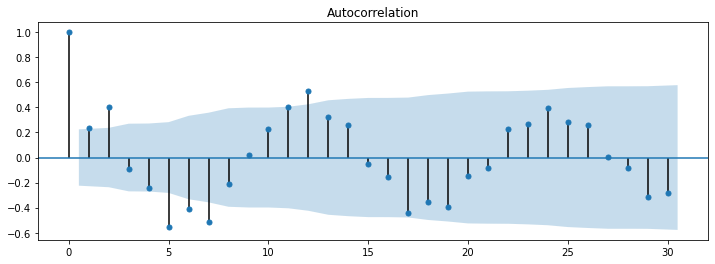

In [151]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12,4))
plot_acf(df_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

PACF Plot

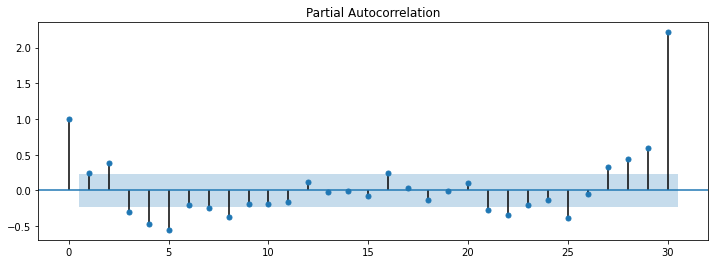

In [153]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(df_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

## Auto regression moving average method (ARMA)

In [177]:
#ARMA(4, 3)

model = ARIMA(train_boxcox_diff, order=(4, 0, 3))
model_fit = model.fit()
print(model_fit.params)

const      0.019612
ar.L1.y    0.252793
ar.L2.y    1.096911
ar.L3.y   -0.639548
ar.L4.y   -0.484809
ma.L1.y   -0.803816
ma.L2.y   -0.778931
ma.L3.y    0.989941
dtype: float64


### Recover original time series

In [178]:
y_hat_arma = df_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(df_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

### Plot train, test and forecast

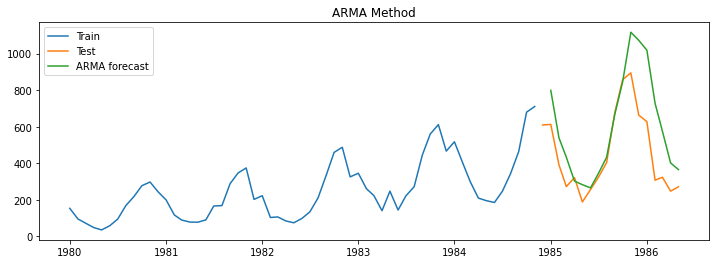

In [179]:
plt.figure(figsize=(12,4))
plt.plot( df['Sales'][:train_len-1], label='Train')
plt.plot(df['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

RMSE and MAPE

In [236]:
rmse = np.sqrt(mean_squared_error(test.Sales, y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test.Sales-y_hat_arma['arma_forecast'][train_len-1:])/test['Sales'])*100,2)

results = pd.DataFrame({'Method':['ARMA method'], 'MAPE': [mape], 'RMSE': [rmse]})
results

,Method,MAPE,RMSE
0,ARMA method,38.96,208.0


## Auto regressive integrated moving average (ARIMA)

In [221]:
model = ARIMA(train_boxcox, order=(4, 1, 3))
model_fit = model.fit()
print(model_fit.params)

const        0.019250
ar.L1.D.y    0.254926
ar.L2.D.y    1.094505
ar.L3.D.y   -0.640823
ar.L4.D.y   -0.482783
ma.L1.D.y   -0.806032
ma.L2.D.y   -0.771680
ma.L3.D.y    0.985163
dtype: float64


### Recover original time series forecast

In [223]:
#start = df_boxcox_diff.index.min().to_pydatetime()
#end = df_boxcox_diff.index.max().to_pydatetime()

In [222]:
y_hat_arima = df_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(df_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

### Plot train, test and forecast

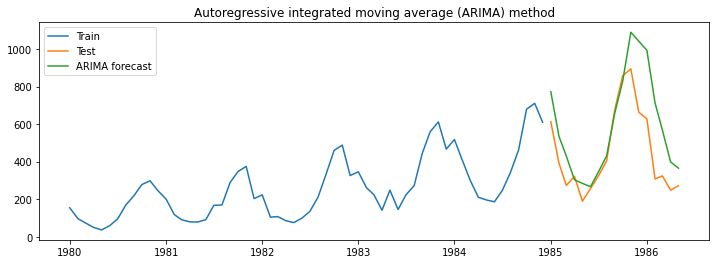

In [224]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

In [237]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arima['arima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['ARIMA method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,ARMA method,208.00,38.96
0,ARIMA method,195.93,37.53


## Seasonal Auto regressive integrated moving average (SARIMA)

In [240]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_boxcox, order=(7, 2, 9), seasonal_order = (3, 1, 1, 12))
model_fit = model.fit()
print(model_fit.params)

ar.L1      -1.227162
ar.L2      -0.712791
ar.L3      -0.093334
ar.L4      -0.113677
ar.L5      -0.560253
ar.L6      -0.713682
ar.L7      -0.382641
ma.L1      -0.253375
ma.L2      -0.506515
ma.L3      -0.323045
ma.L4       0.344641
ma.L5       0.187824
ma.L6      -0.268420
ma.L7      -0.629949
ma.L8      -0.223540
ma.L9       0.690721
ar.S.L12   -0.406273
ar.S.L24   -0.248417
ar.S.L36   -0.670407
ma.S.L12   -0.256300
sigma2      0.017076
dtype: float64


### Recover original time series forecast

In [246]:
y_hat_sarima = df_boxcox_diff.copy()
#y_hat_sarima['sarima_forecast_boxcox_diff'] = model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())
#y_hat_sarima['sarima_forecast_boxcox'] = y_hat_sarima['sarima_forecast_boxcox_diff'].cumsum()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(df_boxcox.index.min(), df_boxcox.index.max())
#y_hat_sarima['sarima_forecast_boxcox'] = y_hat_sarima['sarima_forecast_boxcox'].add(df_boxcox[0])
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

### Plot train, test and forecast

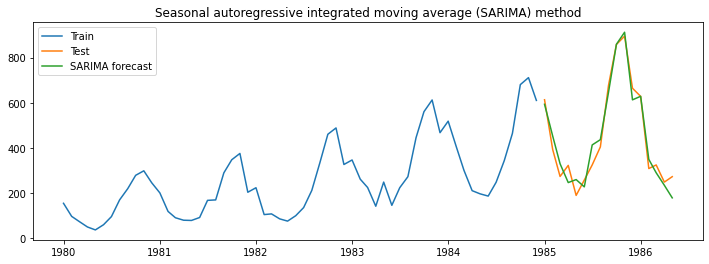

In [247]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

In [248]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['SARIMA method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,ARMA method,208.00,3.896000e+01
0,ARIMA method,195.93,3.753000e+01
0,SARIMA method,inf,8.280831e+182
0,SARIMA method,50.53,1.326000e+01
